# Beta Comparisons

Upper management at Harold's company is looking to potentially invest in a social media stock. They want to be somewhat conservative and look at social media stocks with the lowest beta relative to the others. Harold has been asked to calculate and plot the 30-day rolling betas for social media stocks: Facebook (FB), Twitter (TWTR), and Snapchat (SNAP).

Use the Pandas library to help Harold calculate and plot the 30-day rolling betas for social media stocks, and then determine the social media stock with the lowest beta value.

## Instructions

Using the starter file, complete the following steps.

1. Import libraries and dependencies.

2. Read in the files `fb_data.csv`, `twtr_data.csv`, `snap_data.csv`, and `sp500_data.csv` as Pandas DataFrames. Set the Date column as a datetime index for each DataFrame.

3. Combine the DataFrames so that the closing prices from each DataFrame are stacked column by column.

4. Rename the columns to reflect the corresponding stock.

5. Use the `pct_change` function to calculate daily returns for each stock.

6. Calculate the overall covariances of each stock's daily returns to that of the S&P 500. Calculate the overall variance of S&P 500 daily returns.

7. Calculate the overall beta values of each social media stock.

8. Calculate the rolling 30-day covariances of each stock's daily returns to that of the S&P 500. Calculate the rolling 30-day variance of S&P 500 daily returns.

9. Calculate the rolling 30-day beta values of each social media stock.

10. Plot the rolling 30-day beta values of each social media stock on the same figure. Set the figure legend.

## Hint

Remember to set the `ax` parameter when plotting multiple datasets on a single chart figure.

In [1]:
# Import libraries and dependencies
import pandas as pd

%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of FB, set the `date` as a datetime index

fb_df = pd.read_csv('fb_data.csv', index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index

twtr_df = pd.read_csv('twtr_data.csv', index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index

snap_df = pd.read_csv('snap_data.csv', index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index

sp500_df = pd.read_csv('sp500_data.csv', index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [5]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")


# Sort datetime index in ascending order (past to present)0
combined_df.sort_index(inplace=True)

# Set column names to 'FB' and 'S&P 500'
combined_df.columns = ["FB", "TWTR", "SNAP", "S&P 500"]

# Display a few rows
combined_df.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


### Calculate Daily Returns

In [6]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [10]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
covarianceFB = daily_returns["FB"].cov(daily_returns['S&P 500'])
covarianceFB
covarianceTWTR = daily_returns["TWTR"].cov(daily_returns['S&P 500'])
covarianceTWTR
covarianceSNAP = daily_returns["SNAP"].cov(daily_returns['S&P 500'])
covarianceSNAP

7.769087430496199e-05

### Calculate Variance of S&P 500 Returns

In [11]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.000796173303153e-05

### Calculate Beta Values of Social Media Stocks

In [15]:
# Calculate beta of all daily returns of social media stocks
fb_beta = covarianceFB / variance
fb_beta
twtr_beta = covarianceTWTR / variance
twtr_beta
snap_beta = covarianceSNAP / variance
snap_beta

print(f")

1.1097434117740563

### Calculate 30-Day Rolling Betas of FB, TWTR, SNAP Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of SNAP Returns vs. S&P 500 Returns'}, xlabel='date'>

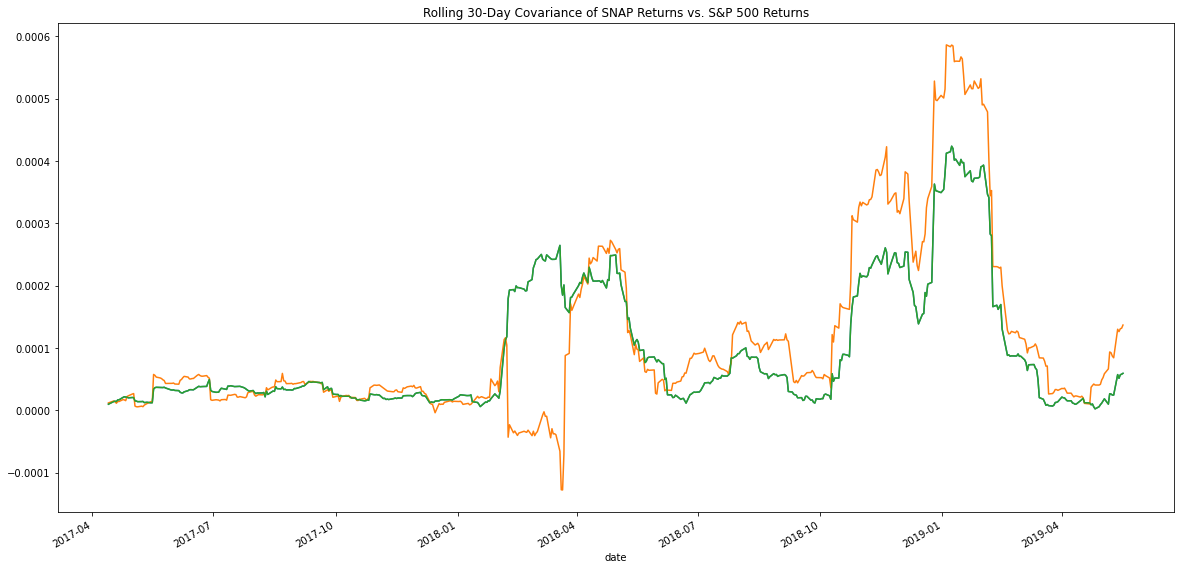

In [18]:
# Calculate 30-day rolling covariance of FB vs. S&P 500 and plot the data

rolling_covariance_fb = daily_returns['FB'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance_fb.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of FB Returns vs. S&P 500 Returns')

# Calculate 30-day rolling covariance of TWTR vs. S&P 500 and plot the data
rolling_covariance_twtr = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance_twtr.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of TWTR Returns vs. S&P 500 Returns')

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_covariance_snap = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance_fb.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of SNAP Returns vs. S&P 500 Returns')


### Plot Rolling 30-Day Betas of Social Media Stocks

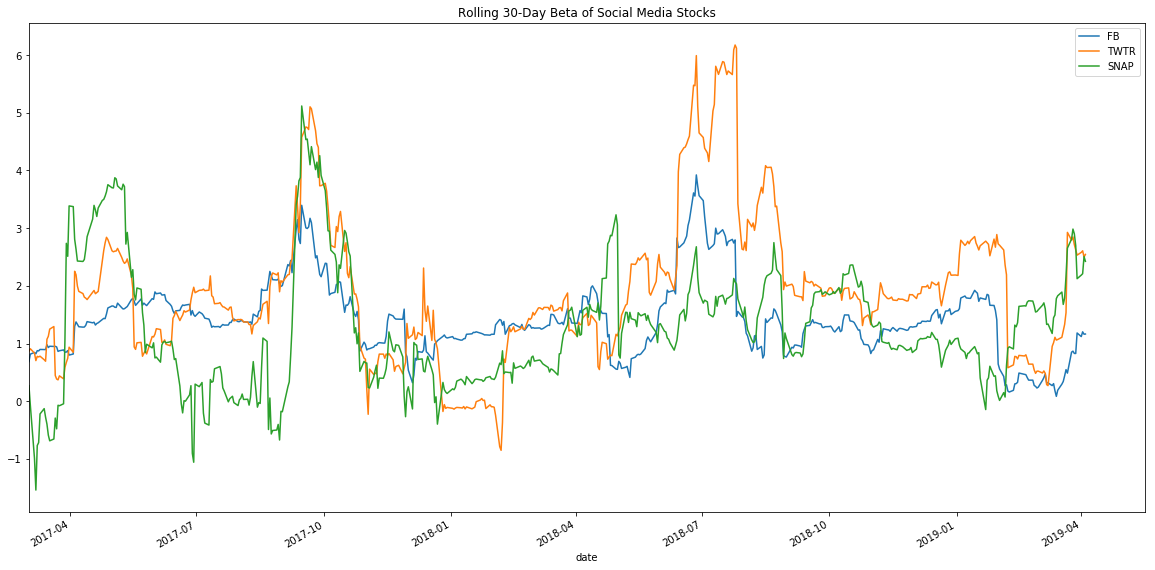

In [9]:
# Set the figure and plot the different datasets as multiple trends on the same figure


# Set the legend of the figure
